In [2]:
# ------------------------------------------------------
# KIDNEY DISEASE MODEL TRAINING
# ------------------------------------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, mean_squared_error, r2_score
)

# Balancing
from imblearn.over_sampling import SMOTE

In [3]:
# ------------------------------------------------------
# 1. Load dataset
# ------------------------------------------------------
df = pd.read_csv("D:\Guvi-Projects\Multiple Disease Project - 4\kidney_disease - kidney_disease.csv")
print("\nDataset head():")
display(df.head())



Dataset head():


<>:4: SyntaxWarning: invalid escape sequence '\G'
<>:4: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Akash Subramanian\AppData\Local\Temp\ipykernel_5796\2425070216.py:4: SyntaxWarning: invalid escape sequence '\G'
  df = pd.read_csv("D:\Guvi-Projects\Multiple Disease Project - 4\kidney_disease - kidney_disease.csv")


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
# ------------------------------------------------------
# 2. Drop ID, cad, ba, pcc, pot columns. 
# ------------------------------------------------------
if 'id' in df.columns:
    df = df.drop(columns=['id'])

In [5]:
# ------------------------------------------------------
# 3. Target encoding (ckd=1, notckd=0)
# ------------------------------------------------------
df['classification'] = df['classification'].replace({'ckd': 1, 'notckd': 0})

target = "classification"

C:\Users\Akash Subramanian\AppData\Local\Temp\ipykernel_5796\327163308.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['classification'] = df['classification'].replace({'ckd': 1, 'notckd': 0})


In [6]:
# ------------------------------------------------------
# 4. Handle null values
# ------------------------------------------------------
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill numeric nulls → median
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical nulls → mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nNull values after imputation:")
print(df.isnull().sum())



Null values after imputation:
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


C:\Users\Akash Subramanian\AppData\Local\Temp\ipykernel_5796\4170916367.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Akash Subramanian\AppData\Local\Temp\ipykernel_5796\4170916367.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [7]:
df.to_csv("kidney_disease_cleaned.csv", index=False)

In [8]:
# ------------------------------------------------------
# 5. Encoding categorical values
# ------------------------------------------------------
for col in cat_cols:
    df[col] = df[col].astype("category").cat.codes


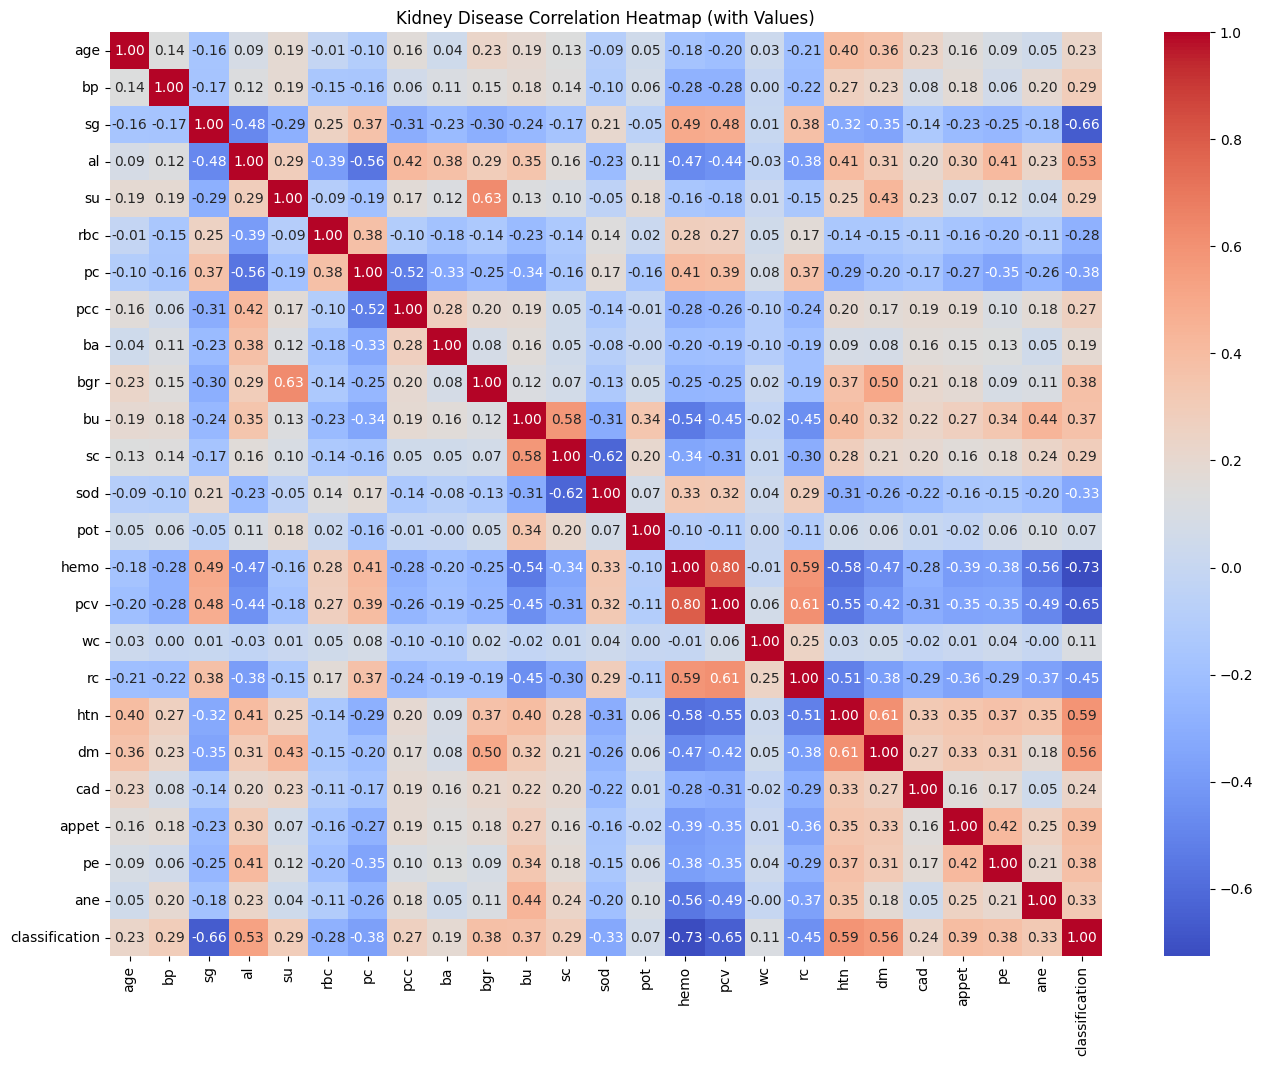

In [30]:
# ------------------------------------------------------
# 6. Correlation Heatmap (Updated with Numeric Values)
# ------------------------------------------------------
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Kidney Disease Correlation Heatmap (with Values)")
plt.show()


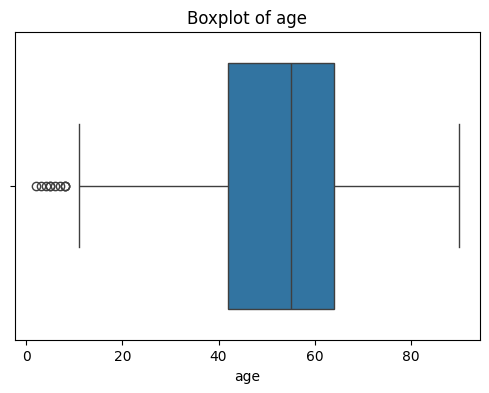

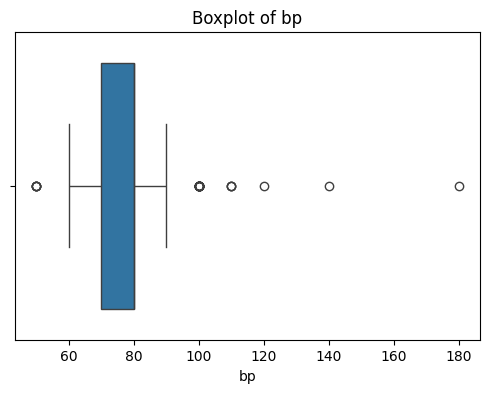

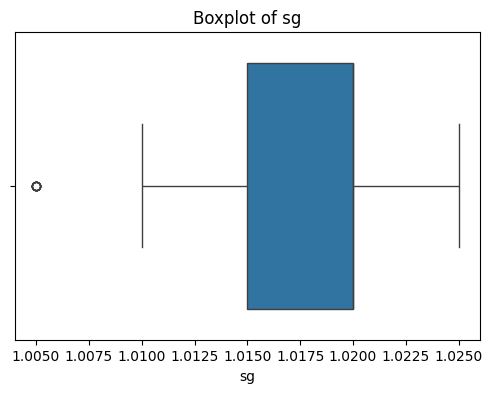

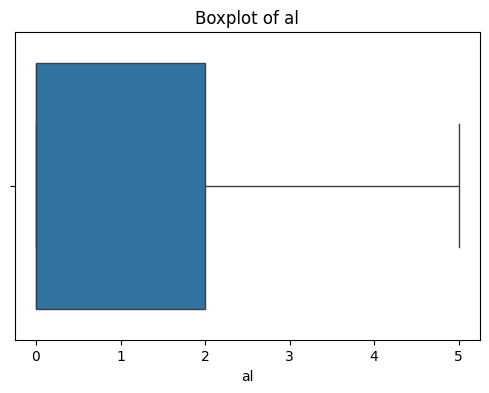

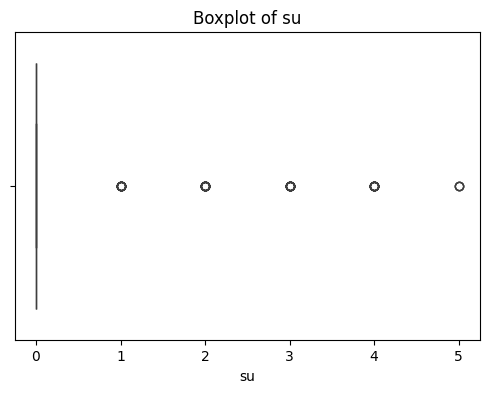

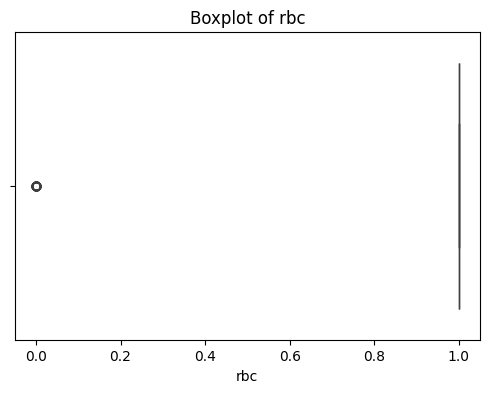

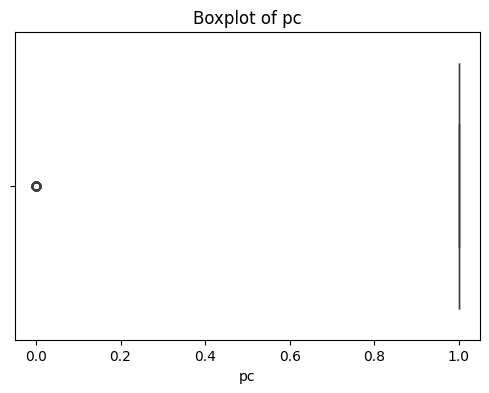

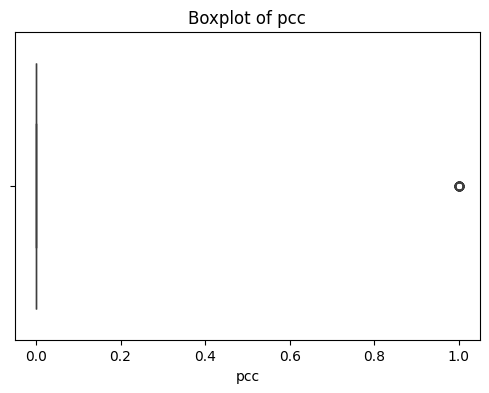

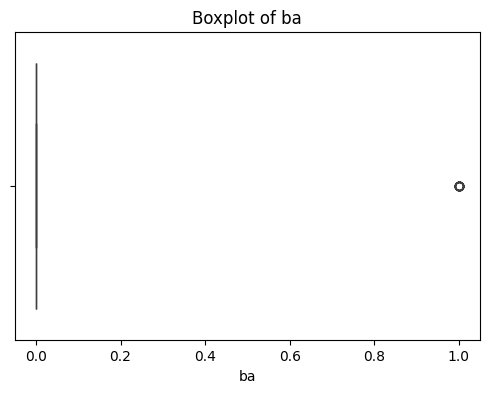

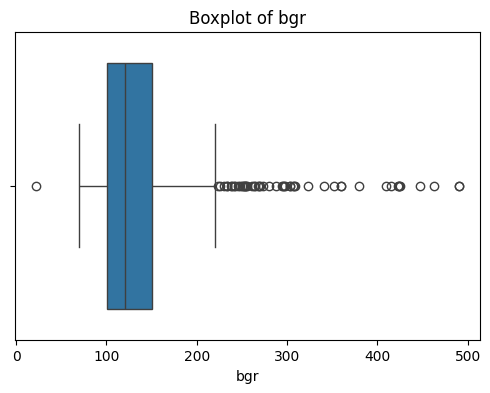

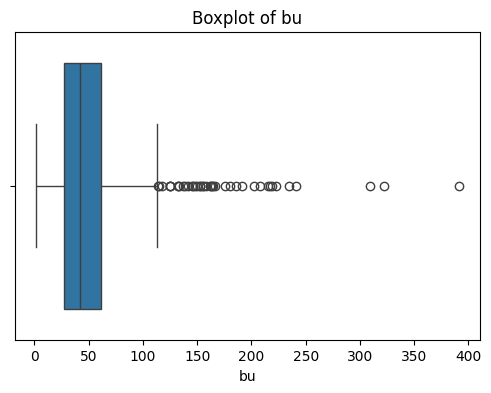

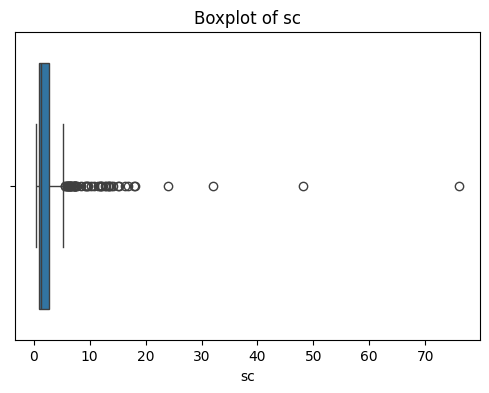

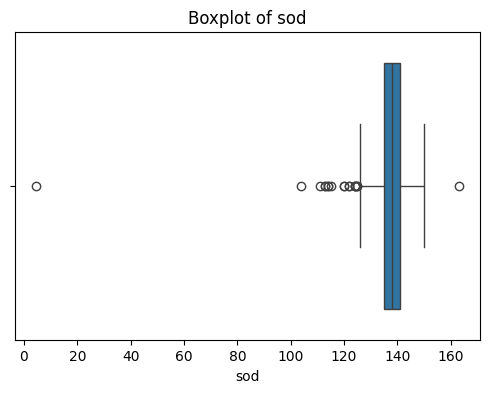

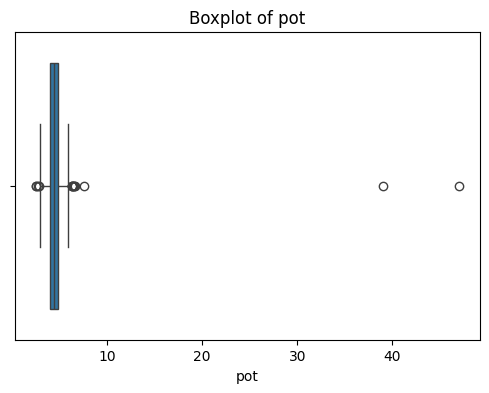

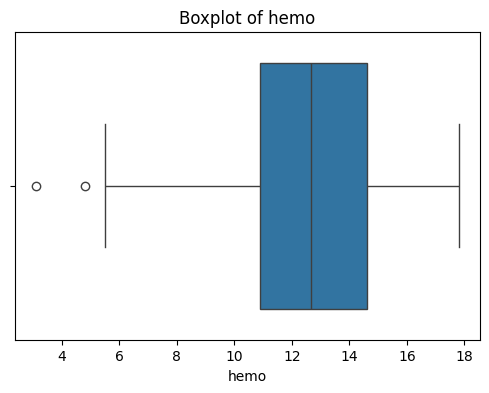

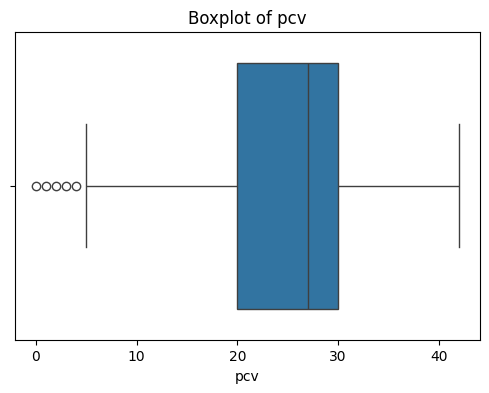

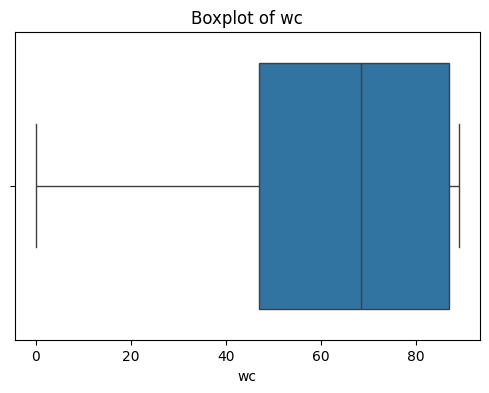

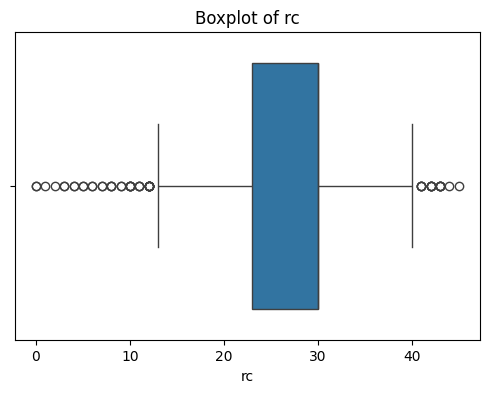

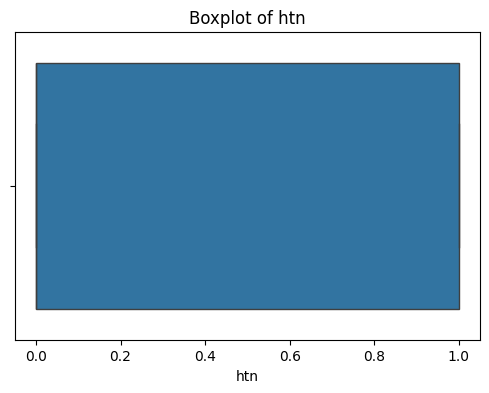

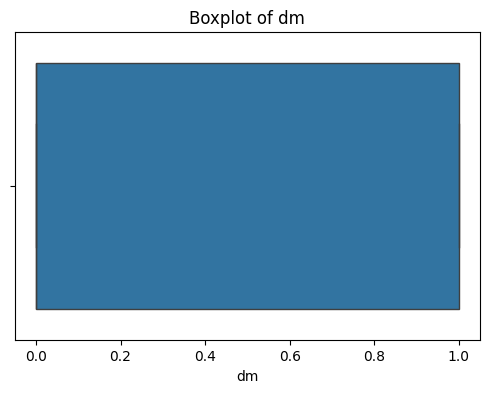

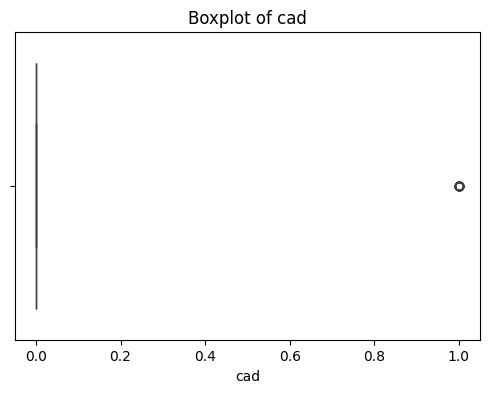

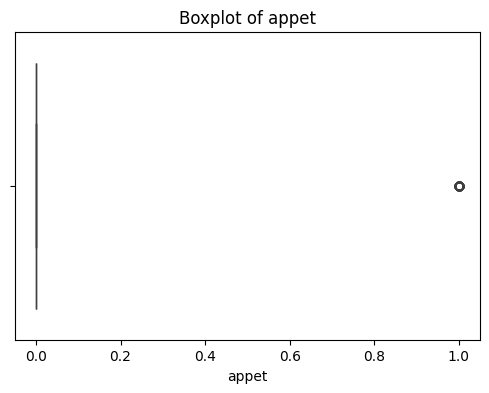

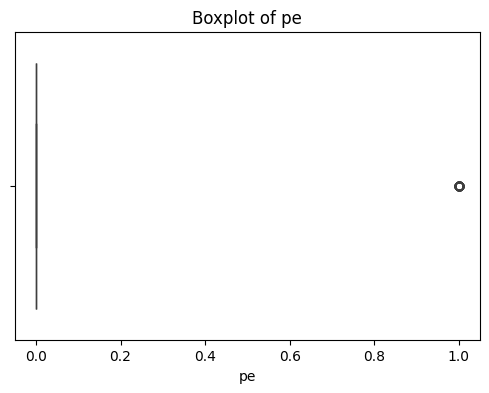

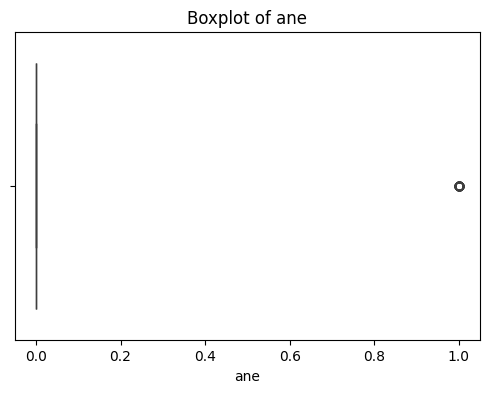

In [12]:
# ------------------------------------------------------
# 7. Boxplot using FOR LOOP (Updated)
# ------------------------------------------------------
numeric_features = df.drop(columns=[target]).columns

for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [34]:
# ------------------------------------------------------
# 8. Feature Extraction (Dropping Unwanted Columns)
# ------------------------------------------------------

drop_cols = ['cad', 'ba', 'pcc', 'pot', 'ane', 'su']

X = df.drop(columns=[target] + drop_cols)
y = df[target]

print("\nSelected Features for Model Training:")
print(X.columns)

print("\nShape of X after feature selection:", X.shape)


Selected Features for Model Training:
Index(['age', 'bp', 'sg', 'al', 'rbc', 'pc', 'bgr', 'bu', 'sc', 'sod', 'hemo',
       'pcv', 'wc', 'rc', 'htn', 'dm', 'appet', 'pe'],
      dtype='object')

Shape of X after feature selection: (400, 18)


In [35]:
# ------------------------------------------------------
# 9. SMOTE Balancing
# ------------------------------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("\nAfter SMOTE balancing:")
print(y_res.value_counts())



After SMOTE balancing:
classification
1    250
0    250
Name: count, dtype: int64


In [36]:
# ------------------------------------------------------
# 10. Train-Test Split
# ------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42
)

In [37]:
# ------------------------------------------------------
# 11. Scaling
# ------------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [38]:
# ------------------------------------------------------
# 12. MODEL TRAINING
# ------------------------------------------------------

# Linear Regression
lin = LinearRegression()
lin.fit(X_train, y_train)

y_pred_lr_cont = lin.predict(X_test)
y_pred_lr = (y_pred_lr_cont >= 0.5).astype(int)

print("\n-------------------")
print("Linear Regression")
print("-------------------")
print("MSE:", mean_squared_error(y_test, y_pred_lr_cont))
print("R2:", r2_score(y_test, y_pred_lr_cont))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


-------------------
Linear Regression
-------------------
MSE: 0.07802447028889292
R2: 0.6858918265342475
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        54
           1       1.00      0.89      0.94        46

    accuracy                           0.95       100
   macro avg       0.96      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [39]:
# Logistic Regression
log = LogisticRegression(max_iter=500)
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))


Logistic Regression Accuracy: 0.99


In [40]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.95


In [41]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.99


In [42]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        46

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



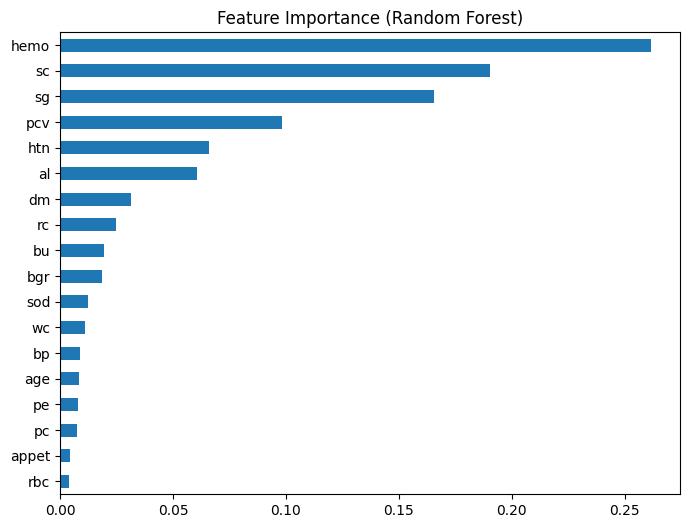

In [43]:
# ------------------------------------------------------
# 13. Feature Importance (Random Forest)
# ------------------------------------------------------
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", figsize=(8, 6))
plt.title("Feature Importance (Random Forest)")
plt.show()

In [44]:
# ------------------------------------------------------
# 14. Save Model + Scaler
# ------------------------------------------------------
pickle.dump(rf, open("kidney_model.pkl", "wb"))
pickle.dump(scaler, open("kidney_scaler.pkl", "wb"))

print("\nKidney Disease Model & Scaler Saved Successfully!")


Kidney Disease Model & Scaler Saved Successfully!
